In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("./new_csv/train.csv")

In [3]:
train.head()

,ID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Label
0,0,37,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,...,80,1,7,2,4,7,5,0,7,0
1,1,54,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,...,80,1,33,2,1,5,4,1,4,0
2,2,34,Travel_Frequently,Research & Development,7,3,Life Sciences,147,1,Male,...,80,0,9,3,3,9,7,0,6,1
3,3,39,Travel_Rarely,Research & Development,1,1,Life Sciences,1026,4,Female,...,80,1,21,3,3,21,6,11,8,0
4,4,28,Travel_Frequently,Research & Development,1,3,Medical,1111,1,Male,...,80,2,1,2,3,1,0,0,0,1


In [4]:
train.describe()

,ID,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Label
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,549.500000,36.999091,9.427273,2.922727,1028.157273,2.725455,2.730909,2.054545,2.732727,6483.620909,...,80.0,0.788182,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636,0.161818
std,317.686953,9.037230,8.196694,1.022242,598.915204,1.098053,0.706366,1.107805,1.109731,4715.293419,...,0.0,0.843347,7.825548,1.291514,0.701121,6.223093,3.618115,3.313830,3.597996,0.368451
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,274.750000,30.000000,2.000000,2.000000,504.250000,2.000000,2.000000,1.000000,2.000000,2924.500000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,549.500000,36.000000,7.000000,3.000000,1026.500000,3.000000,3.000000,2.000000,3.000000,4857.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,824.250000,43.000000,15.000000,4.000000,1556.500000,4.000000,3.000000,3.000000,4.000000,8354.500000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,1099.000000,60.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000,1.000000


In [5]:
train.isnull().sum()

ID                          0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Label                       0
dtype: int64

In [6]:
drop_cols = ["EmployeeNumber", "TotalWorkingYears", "MonthlyIncome", "PercentSalaryHike","YearsWithCurrManager", "YearsAtCompany", "YearsInCurrentRole", "Over18", "StandardHours"]
cols = []
for co in train.columns:
    if co not in drop_cols:
        cols.append(co)
len(cols)

23

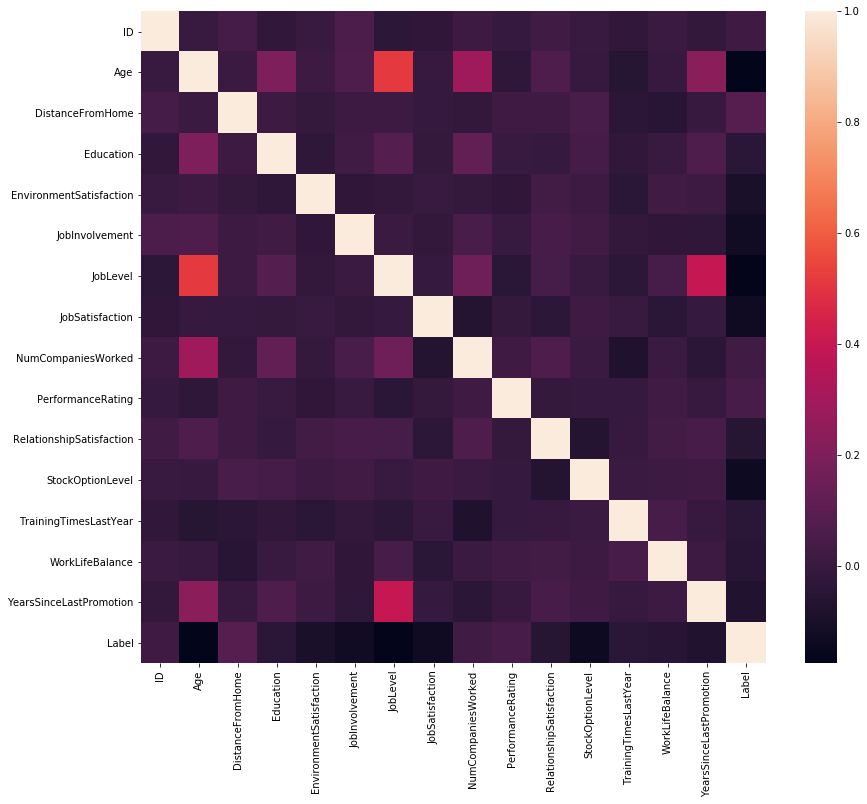

In [7]:
plt.figure(figsize = (14,12))
sns.heatmap(data=train[cols].corr())
plt.show()

In [8]:
data_train = train[cols]

In [9]:
data_train.BusinessTravel.value_counts()
data_train.BusinessTravel = data_train.BusinessTravel.map({"Non-Travel":1, "Travel_Rarely":2, "Travel_Frequently":3})

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [10]:
data_train.Department.value_counts()
data_train.Department = data_train.Department.map({"Research & Development":1, "Sales":2, "Human Resources":3})

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [11]:
data_train.Gender.value_counts()
data_train.Gender = data_train.Gender.map({"Male":1, "Female":2})

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [12]:
data_train.OverTime.value_counts()
data_train.OverTime = data_train.OverTime.map({"No":0, "Yes":1})

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [13]:
data_train.EducationField.value_counts()
data_train.EducationField = data_train.EducationField.map({"Other":0, "Medical":1, "Life Sciences":2, "Marketing":3, "Technical Degree":4, "Human Resources":5})

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [14]:
data_train.JobRole.value_counts()
data_train.JobRole = data_train.JobRole.map({"Research Director":0, "Healthcare Representative":1, "Manager":2, "Manufacturing Director":3, "Sales Executive":4, "Research Scientist":5, "Laboratory Technician":6, "Human Resources":7, "Sales Representative":8})

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [15]:
data_train.MaritalStatus.value_counts()
data_train.MaritalStatus = data_train.MaritalStatus.map({"Divorced":1, "Married":2, "Single":3})

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


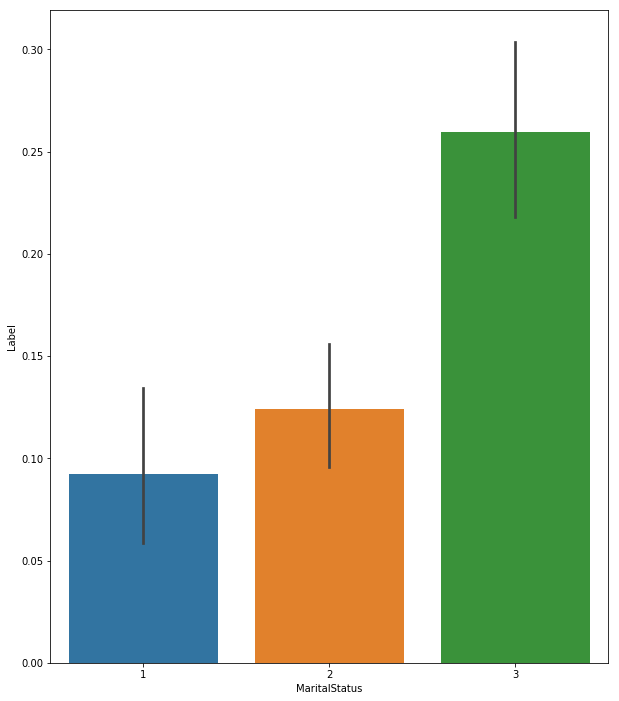

In [16]:
plt.figure(figsize = (10,12))
sns.barplot(data_train.MaritalStatus, data_train.Label)

#### model

In [17]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV

In [245]:
y = data_train.Label
X = data_train.drop(["Label"], axis=1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)
model = linear_model.LogisticRegression(solver="liblinear", penalty="l2", C=2.4, max_iter=100)
model.fit(X_train, y_train)
pred = model.predict(X=X_test)
score = metrics.accuracy_score(y_test, pred)
score_true = metrics.recall_score(y_test, pred)
score_false = metrics.recall_score(y_test, pred, pos_label=0)
print("理论准确率：", model.score(X_train, y_train))
print("实际准确率:", score)
print("正例覆盖率：", score_true)
print("负例覆盖率：", score_false)

理论准确率： 0.8836363636363637
实际准确率: 0.8763636363636363
正例覆盖率： 0.4
负例覆盖率： 0.9695652173913043


In [19]:
'''
data_test.BusinessTravel = data_train.BusinessTravel.map({"Non-Travel":1, "Travel_Rarely":2, "Travel_Frequently":3})
data_test.Department = data_train.Department.map({"Research & Development":1, "Sales":2, "Human Resources":3})
data_test.Gender = data_train.Gender.map({"Male":1, "Female":2})
data_test.OverTime = data_train.OverTime.map({"No":0, "Yes":1})
data_test.EducationField = data_train.EducationField.map({"Other":0, "Medical":1, "Life Sciences":2, "Marketing":3, "Technical Degree":4, "Human Resources":5})
data_test.JobRole = data_train.JobRole.map({"Research Director":0, "Healthcare Representative":1, "Manager":2, "Manufacturing Director":3, "Sales Executive":4, "Research Scientist":5, "Laboratory Technician":6, "Human Resources":7, "Sales Representative":8})
data_test.MaritalStatus = data_train.MaritalStatus.map({"Divorced":1, "Married":2, "Single":3})
data_test = data_test.drop(columns=drop_cols)
'''

'\ndata_test.BusinessTravel = data_train.BusinessTravel.map({"Non-Travel":1, "Travel_Rarely":2, "Travel_Frequently":3})\ndata_test.Department = data_train.Department.map({"Research & Development":1, "Sales":2, "Human Resources":3})\ndata_test.Gender = data_train.Gender.map({"Male":1, "Female":2})\ndata_test.OverTime = data_train.OverTime.map({"No":0, "Yes":1})\ndata_test.EducationField = data_train.EducationField.map({"Other":0, "Medical":1, "Life Sciences":2, "Marketing":3, "Technical Degree":4, "Human Resources":5})\ndata_test.JobRole = data_train.JobRole.map({"Research Director":0, "Healthcare Representative":1, "Manager":2, "Manufacturing Director":3, "Sales Executive":4, "Research Scientist":5, "Laboratory Technician":6, "Human Resources":7, "Sales Representative":8})\ndata_test.MaritalStatus = data_train.MaritalStatus.map({"Divorced":1, "Married":2, "Single":3})\ndata_test = data_test.drop(columns=drop_cols)\n'

In [105]:
data_test = pd.read_csv("./new_csv/test_noLabel.csv")
cols_test = []
for co in data_test.columns:
    if co not in drop_cols:
        cols_test.append(co)
data_test = data_test[cols_test]
data_test.BusinessTravel = data_test.BusinessTravel.map({"Non-Travel":1, "Travel_Rarely":2, "Travel_Frequently":3})
data_test.Department = data_test.Department.map({"Research & Development":1, "Sales":2, "Human Resources":3})
data_test.Gender = data_test.Gender.map({"Male":1, "Female":2})
data_test.OverTime = data_test.OverTime.map({"No":0, "Yes":1})
data_test.EducationField = data_test.EducationField.map({"Other":0, "Medical":1, "Life Sciences":2, "Marketing":3, "Technical Degree":4, "Human Resources":5})
data_test.JobRole = data_test.JobRole.map({"Research Director":0, "Healthcare Representative":1, "Manager":2, "Manufacturing Director":3, "Sales Executive":4, "Research Scientist":5, "Laboratory Technician":6, "Human Resources":7, "Sales Representative":8})
data_test.MaritalStatus = data_test.MaritalStatus.map({"Divorced":1, "Married":2, "Single":3})

result = model.predict(X=data_test)
df = pd.DataFrame({'Label':result})
df.to_csv("output.csv", index=False, sep=',')